# Proyek Analisis Data: [Bike Sharing Datasheet]
- **Nama:** [Brian Ilham Hermatristan]
- **Email:** [m008b4ky0872@bangkit.academy]
- **ID Dicoding:** [brian_ilham]

## Menentukan Pertanyaan Bisnis

- What's the correlation between temperature and bike rentals?
- What's the correlation between weather type and bike rentals?

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
day_df = pd.read_csv("/content/day.csv")
hours_df = pd.read_csv("/content/hour.csv")

new_order_df = pd.merge(
    left=day_df,
    right=hours_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)

print(new_order_df.shape)
new_order_df.head()

(17379, 32)


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

  Here are some information about the dataset :    
- dteday: Date
- season: Season (e.g., 1:spring, 2:summer, 3:fall, 4:winter)
- yr: Year (e.g., 0: 2011, 1:2012)
- mnth: Month (1 to 12)
- holiday: Whether the day is a holiday or not (extracted from [holiday_calendar])
- weekday: Day of the week
- workingday: If the day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit: (extracted from [weather_data])
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius.
- atemp: Normalized feeling temperature in Celsius.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: Count of casual users
- registered: Count of registered users
- cnt: Count of total rental bikes including both casual and registered
- hr: Hour (0 to 23)

The provided code merges two DataFrames, day_df and hours_df which contain data on daily and hourly bike rentals respectively, into a new DataFrame called new_order_df.

  This is achieved using the merge function from the Pandas library, with an inner join specified. The join is performed by matching values in the dteday column which represents the date.

  The resulting new_order_df DataFrame combines information from both original DataFrames based on the common date.

### Assessing Data

In [32]:
print(new_order_df.info())
print(new_order_df.isnull().sum())
print(new_order_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

**Insight:**
The new_order_df DataFrame:

- Is complete with no missing values.
- Contains no duplicate rows.
- Has a dteday column that needs to be converted to datetime format for better analysis.

### Cleaning Data

In [33]:
new_order_df['dteday'] = pd.to_datetime(new_order_df['dteday'])

**Insight:**
- The dteday column is likely in a string format (object dtype), which can be cumbersome for analysis, especially for time-series operations.

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
new_order_df.describe(include="all")

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


array([[<Axes: title={'center': 'instant_x'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season_x'}>,
        <Axes: title={'center': 'yr_x'}>,
        <Axes: title={'center': 'mnth_x'}>,
        <Axes: title={'center': 'holiday_x'}>],
       [<Axes: title={'center': 'weekday_x'}>,
        <Axes: title={'center': 'workingday_x'}>,
        <Axes: title={'center': 'weathersit_x'}>,
        <Axes: title={'center': 'temp_x'}>,
        <Axes: title={'center': 'atemp_x'}>,
        <Axes: title={'center': 'hum_x'}>],
       [<Axes: title={'center': 'windspeed_x'}>,
        <Axes: title={'center': 'casual_x'}>,
        <Axes: title={'center': 'registered_x'}>,
        <Axes: title={'center': 'cnt_x'}>,
        <Axes: title={'center': 'instant_y'}>,
        <Axes: title={'center': 'season_y'}>],
       [<Axes: title={'center': 'yr_y'}>,
        <Axes: title={'center': 'mnth_y'}>,
        <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday_

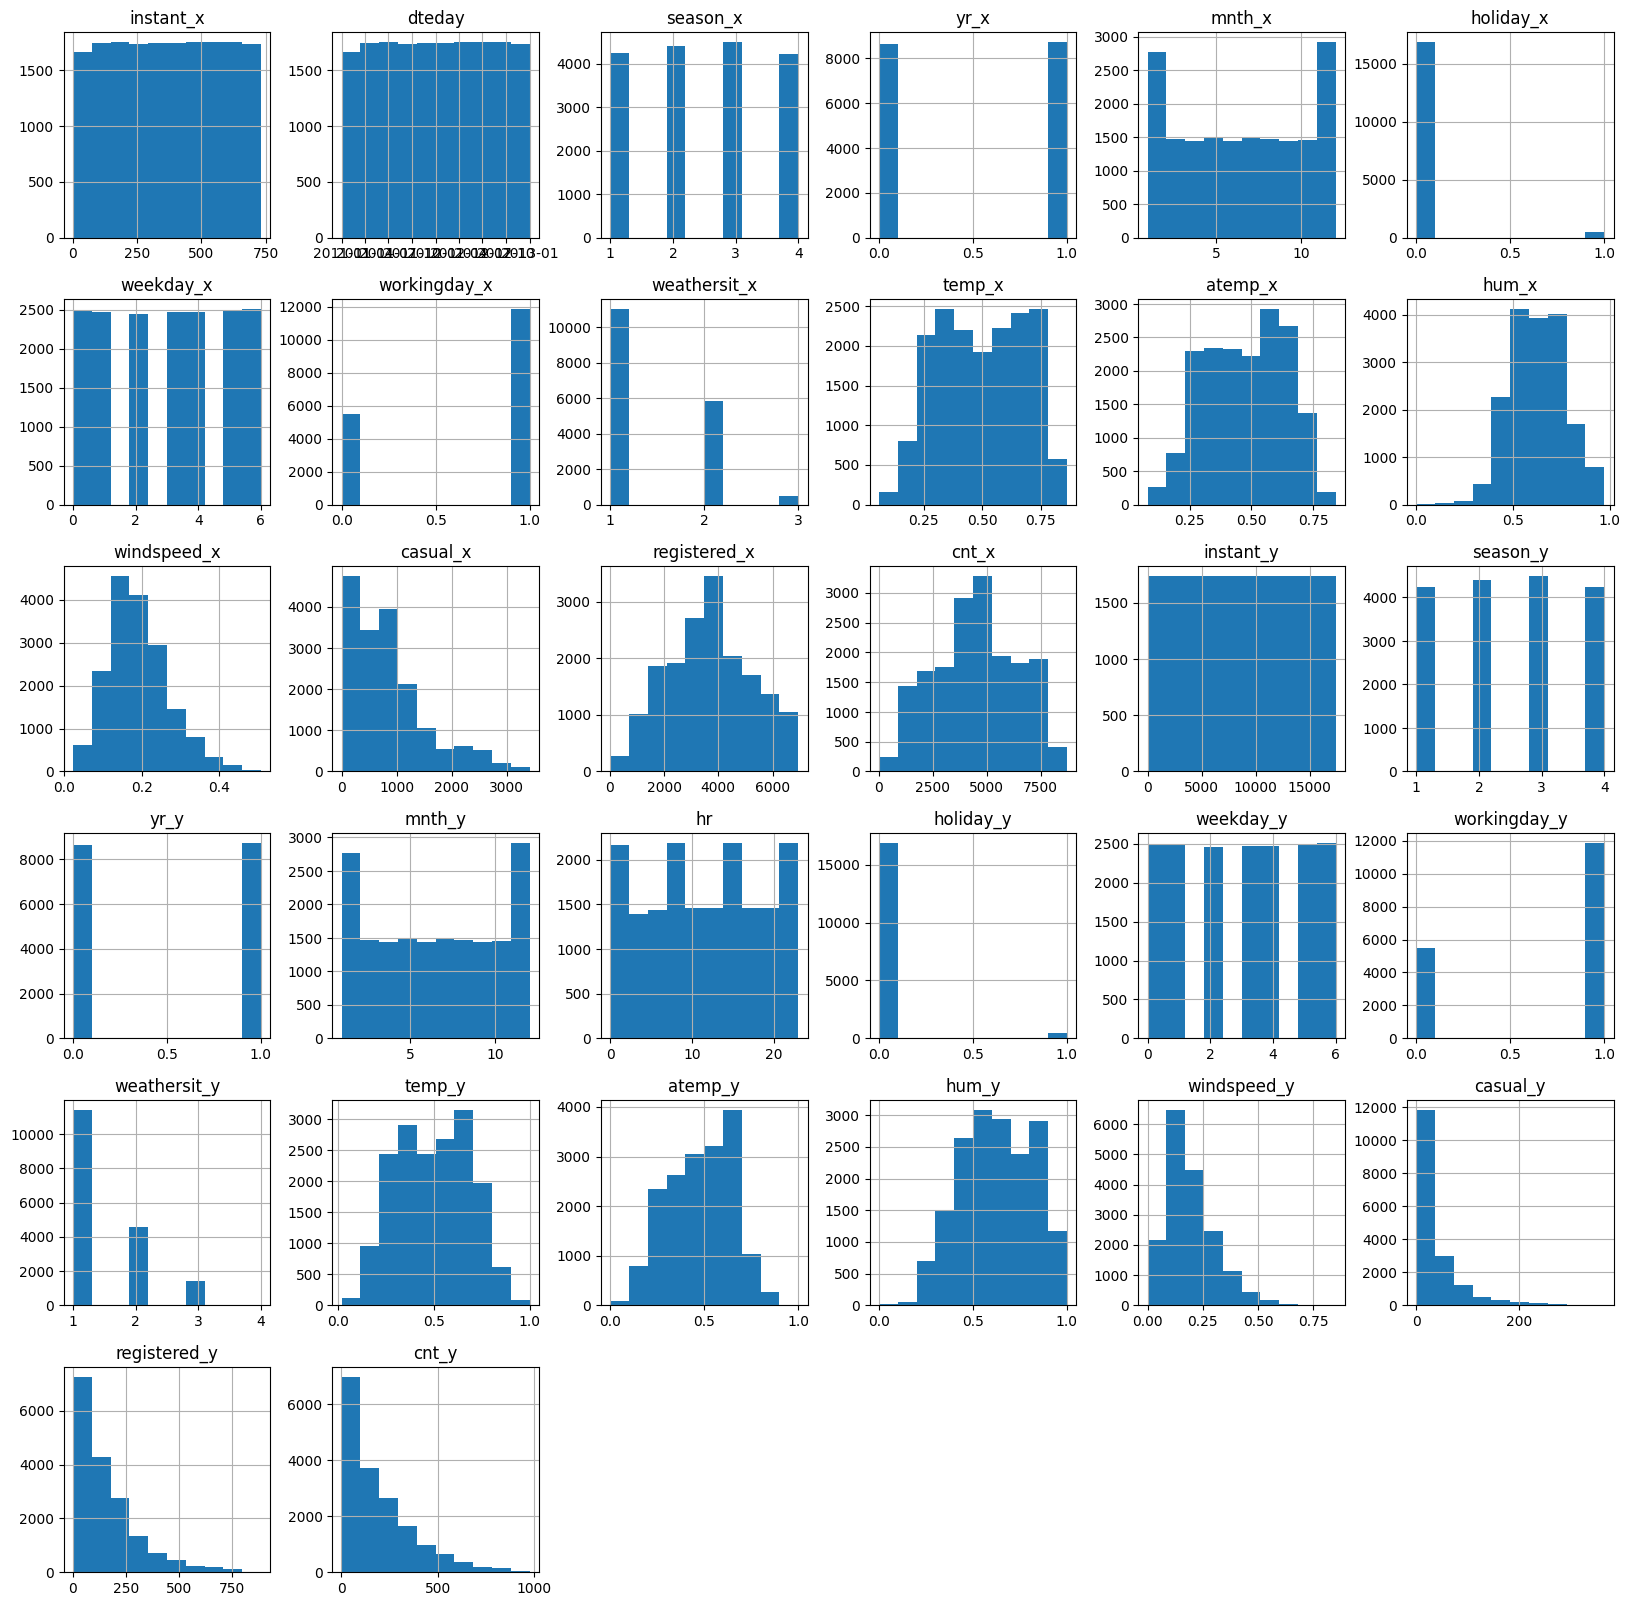

In [35]:
new_order_df.hist(figsize=(20,20))

**Insight :**

We can see that bike rentals are popular, especially in good weather during spring and summer. Although rentals are generally consistent, there are some days with much higher demand, which could be good for increasing profits. Knowing that good weather encourages people to rent bikes is useful for planning marketing and making sure there are enough bikes available. It's also important to look into why rentals drop on days with strong winds so we can find ways to keep customers renting even in less ideal conditions. This information can help improve the business by setting the right prices, targeting ads effectively, and making sure enough bikes are ready when people want them.



## Visualization & Explanatory Analysis

### Pertanyaan 1: What's the correlation between temperature and bike rentals

Correlation between temperature and bike rentals: 0.40


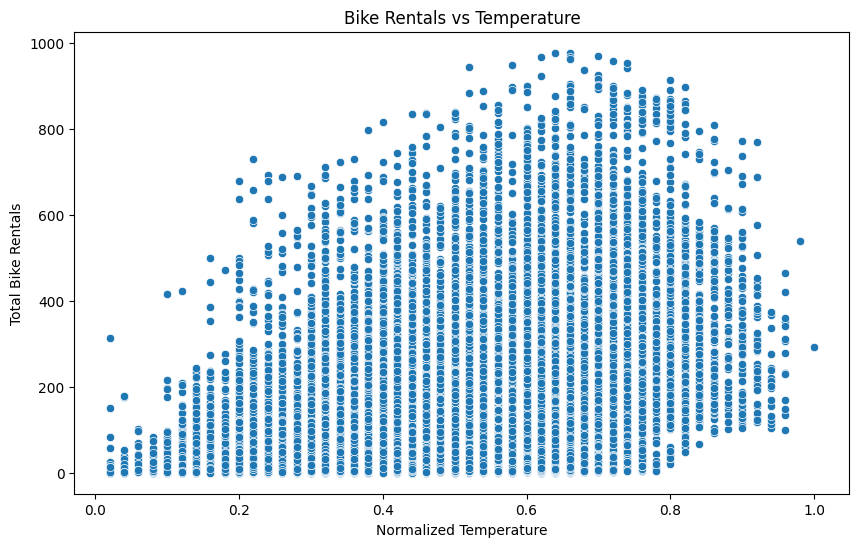

In [36]:
correlation = new_order_df['temp_y'].corr(new_order_df['cnt_y'])
print(f"Correlation between temperature and bike rentals: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_y', y='cnt_y', data=new_order_df)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

### Pertanyaan 2: What's the correlation between weather type and bike rentals

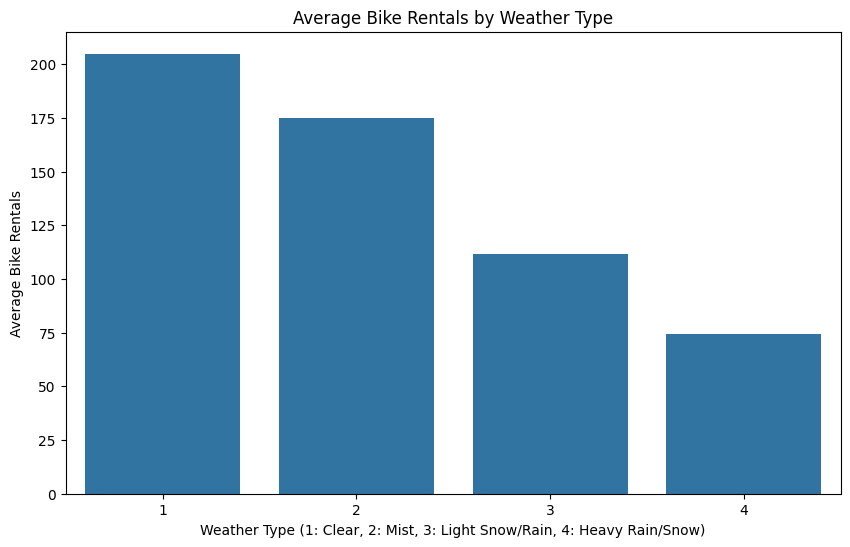

In [37]:
weather_rentals = new_order_df.groupby('weathersit_y')['cnt_y'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_y', y='cnt_y', data=weather_rentals)
plt.title('Average Bike Rentals by Weather Type')
plt.xlabel('Weather Type (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Average Bike Rentals')
plt.show()

**Insight:**

**Question 1: What's the correlation between temperature and bike rentals?**

Higher temperatures are generally associated with increased bike rentals, indicating a positive correlation. However, extremely high temperatures might have a negative impact, suggesting an optimal temperature range for maximizing rentals.

**Question 2: What's the correlation between weather type and bike rentals?**

Clear weather conditions have the highest average bike rentals, followed by mist and cloudy conditions. Light rain or snow negatively impacts rentals, and heavy rain or snow significantly reduces demand. This highlights the importance of weather-based marketing and operational strategies.

## Analisis Lanjutan (Opsional)

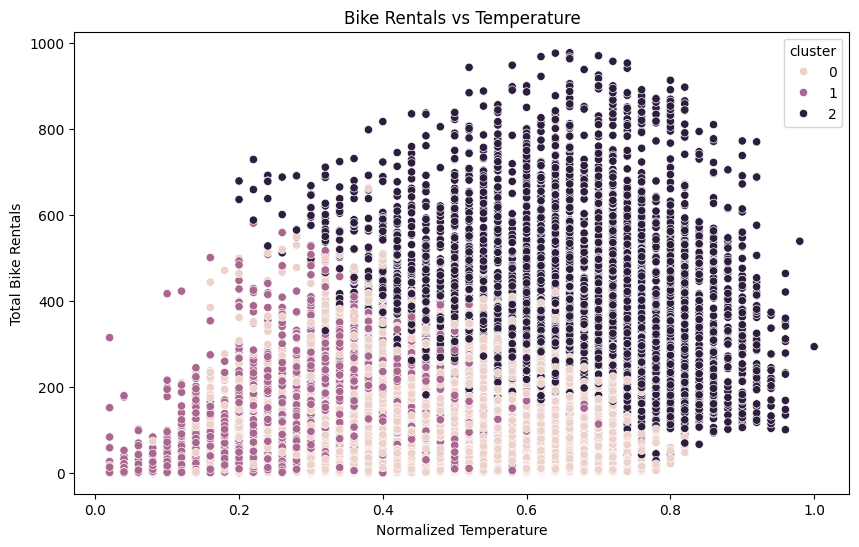

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = ['temp_y', 'hum_y', 'windspeed_y', 'cnt_y']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_order_df[features])


kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(scaled_data)


labels = kmeans.labels_


new_order_df['cluster'] = labels


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_y', y='cnt_y', hue='cluster', data=new_order_df)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

## Conclusion

**Temperature and Bike Rentals**: There's a positive correlation between temperature and bike rentals, with moderate temperatures being ideal for cycling. This suggests adjusting pricing or offering promotions during pleasant weather to maximize rentals.

**Weather Type and Bike Rentals**: Clear weather strongly encourages bike rentals, while adverse conditions like heavy rain or snow significantly decrease demand. This highlights the need for dynamic pricing, targeted marketing, and potentially offering alternative services during unfavorable weather.

**Additional Analysis**: The clusters identified through K-Means analysis reveal distinct customer groups based on factors like temperature, humidity, windspeed, and rental behavior. This segmentation can be used to tailor marketing efforts, personalize offers, and optimize resource allocation for different customer segments.

For example, you could target customers in the "high-rental, good weather" cluster with premium services or loyalty programs, while offering discounts or alternative transportation options to those in the "low-rental, bad weather" cluster.

In [39]:
new_order_df.to_csv("new_order_data.csv", index=False)